In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (24, 8)
import numpy as np
import pandas as pd
import json
import os
from sklearn import linear_model
from luminol import anomaly_detector

In [2]:
seriesdates = []
series = {}
directory = os.path.join(os.getcwd(), 'data')
for filename in sorted(os.listdir(directory)):
    if not filename.endswith(".json") or not "_18" in filename:
        continue
    with open(os.path.join(directory, filename)) as data_file:
        data = json.load(data_file)
        for element in data:
            date = pd.to_datetime(element['source']['date'])
            seriesdates.append(date)
            for tag in element['source']['tags']:
                if tag not in series:
                    series[tag] = []
                series[tag].append(date)

In [3]:
main_ts = pd.Series(1, index = seriesdates)

In [4]:
main_resampled = main_ts.resample('30Min').sum()

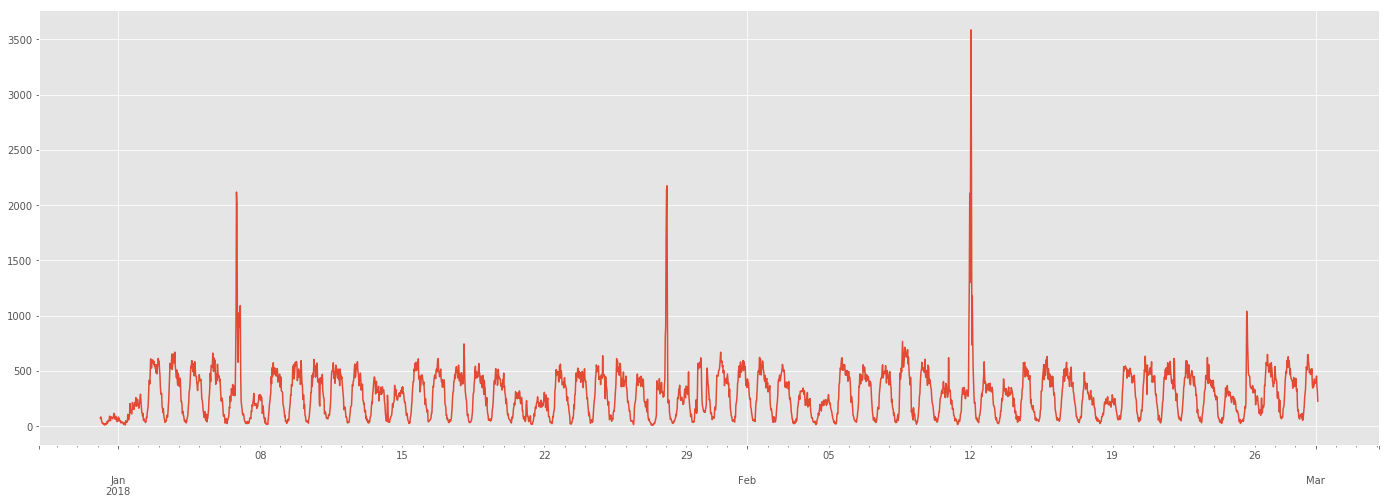

In [49]:
main_resampled.plot()

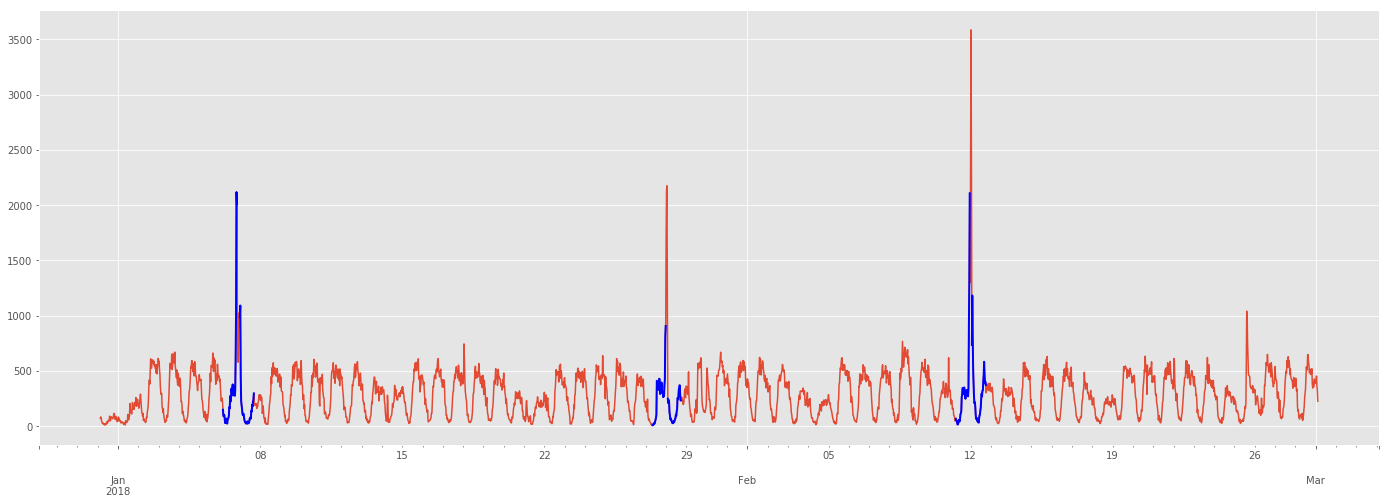

In [72]:
from collections import OrderedDict

def epoch2ts(val):
    return pd.to_datetime(val, unit='s')

lumi_ts = {k.timestamp(): v for k, v in main_resampled.to_dict(into=OrderedDict).items()}
detector = anomaly_detector.AnomalyDetector(lumi_ts, algorith)
anomalies = detector.get_anomalies()
main_resampled.plot()
for a in anomalies:
    #print(epoch2ts(a.exact_timestamp))
    start, end = a.get_time_window()
    pd.Series({epoch2ts(k): lumi_ts[k] for k in lumi_ts.keys() if k >= start and k <= end}).plot(color='blue',linewidth=2.0)